<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/EulerDerivative_sinAndcos_ntheta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$\frac{de^{jn\theta}}{d\theta}=jne^{jn\theta}=-n\sin(n\theta)+jn\cos(n\theta)$</h1></b>

Dr. Bingsen Wang

2/9/2025
</center>

#Python Code

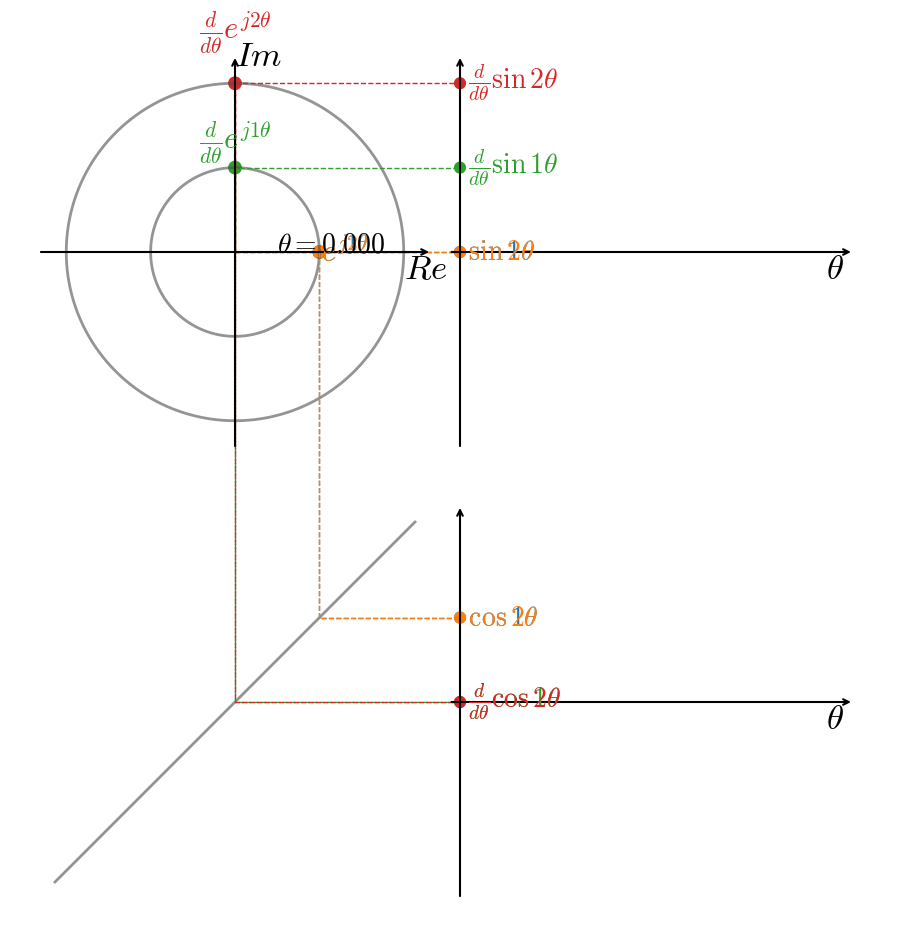

In [71]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nl,Nf,r,x0,y0 = 2,1000,1.5,[0,4,4],[0,0,-8]
n,theta = np.linspace(1,Nl,Nl),np.linspace(0,np.pi*2,Nf)
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-4,12],ylim=[-12,4])
ax.axis('off')
ax.plot(r*np.cos(theta),r*np.sin(theta),2*r*np.cos(theta),2*r*np.sin(theta),[3.2,-3.2],[y0[2]+3.2,y0[2]-3.2],lw=2,c='0.3',alpha=.6)
[ax.annotate('',[(x0[i]+[3.5,7,7][i],y0[i]),(x0[i],y0[i]+3.5)][k],
              [(x0[i]+[-3.5,-.2,-.2][i],y0[i]),(x0[i],y0[i]-3.5)][k],
             arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(3) for k in range(2)]
[ax.text([x0[i]+[3,6.5,6.5][i],x0[i]][k],[y0[i],y0[i]+3.8][k],
         ['$Re$',r'$\theta$',r'$\theta$','$Im$','',''][i+k*3],
         size=25,va='top') for i in range(3) for k in range(2)]
sc=[ax.scatter(np.zeros(2*Nl),np.zeros(2*Nl),marker='o',c=clst[:Nl*2],s=[80,60,60][k]) for k in range(3)]
lines=[[ax.plot([],[],ls=(['--']*2+['-']*4)[k],lw=([1]*2+[3-1.5*i/(2*Nl-1)]*4)[k],
                c=clst[i])[0] for i in range(2*Nl)] for k in range(6)]
lines.append(ax.plot([],[],lw=2,c='k')[0])
txt = [[ax.text(0,0,'',c=clst[i],size=[22,20,20][k],ha=['center','left','left'][k],
                va='center') for i in range(2*Nl)] for k in range(3)]
txt.append(ax.text(0,0,'',c='k',size=20))
def animate(k):
  # k=100
  ejnt = np.array([r*np.exp(1j*theta[:k+1]*n[i]) for i in range(Nl)]+[1j*n[i]*r*np.exp(1j*theta[:k+1]*n[i]) for i in range(Nl)])
  ejnt1=ejnt[:,-1]
  # print(ejnt1)
  [sc[i].set_offsets(np.c_[x0[i]+([ejnt1.real]+[theta[k]+np.zeros(Nl*2)]*2)[i],y0[i]+([ejnt1.imag]*2+[ejnt1.real])[i]]) for i in range(3)]
  [lines[m][i].set_data([[0,ejnt1[i].real,theta[k]+x0[1]],[ejnt1[i].real]*2+[theta[k]+x0[2]]][m],
   [[0,ejnt1[i].imag,ejnt1[i].imag],[ejnt1[i].imag]+[y0[2]+ejnt1[i].real]*2][m]) for i in range(2*Nl) for m in range(2)]
  [lines[2+m][i].set_data(x0[1+m]+theta[:k+1],y0[1+m]+[ejnt.imag[i],ejnt.real[i]][m]) for i in range(2*Nl) for m in range(2)]
  lines[-1].set_data(.4*ejnt[0].real,.4*ejnt[0].imag)
  [txt[m][i].set_text([rf'$e^{{j',rf' $\sin{{',rf' $\cos{{'][m]+rf'{n[i]:.0f}\theta}}$')
     for i in range(Nl) for m in range(3)]
  [txt[m][i+Nl].set_text([rf'$\frac{{d}}{{d\theta}}e^{{j',rf' $\frac{{d}}{{d\theta}}\sin{{',rf' $\frac{{d}}{{d\theta}}\cos{{'][m]+rf'{n[i]:.0f}\theta}}$')
     for i in range(Nl) for m in range(3)]
  [txt[m][i].set_position((x0[m]+[1.3*ejnt[i,-1].real,theta[k],theta[k]][m],
   y0[m]+[1.3*ejnt[i,-1].imag,ejnt[i,-1].imag,ejnt[i,-1].real][m])) for i in range(2*Nl) for m in range(3)]
  txt[3].set_position((.5*r*np.cos(theta[k]/2),.5*r*np.sin(theta[k]/2)))
  txt[3].set_text(fr'$\theta={theta[k]:.3f}$')
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("EulerDerivative_sincos_ntheta.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)